# Taller 5
## Andrés David Campos
### 201413737

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from scipy import ndimage
from skimage.feature import canny

## Medición del Tamaño de Grano

Este trabajo se basa en la norma ASTM E112 de medición de tamaño de grano, utilizando análisis de imagen. Especificamente, utilizando el método de conteo por intersección.

Este método cuenta los granos al trazar una linea (a 0° o 90° de la imagen) de longitud conocida sobre la micrografía, sacando el número de intersecciones que esta tiene (número de granos interceptados). A partir de este conteo, se realiza un promedio con las demas lineas generadas y se obtiene el tamaño de grano G con la siguiente expresión:

$G=(6.643856\log_{10}\bar{N}_L)-3.288$

Y a partir de este número se saca el tamaño de grano utilizando la siguiente tabla (Obtenida de ASTM E112):

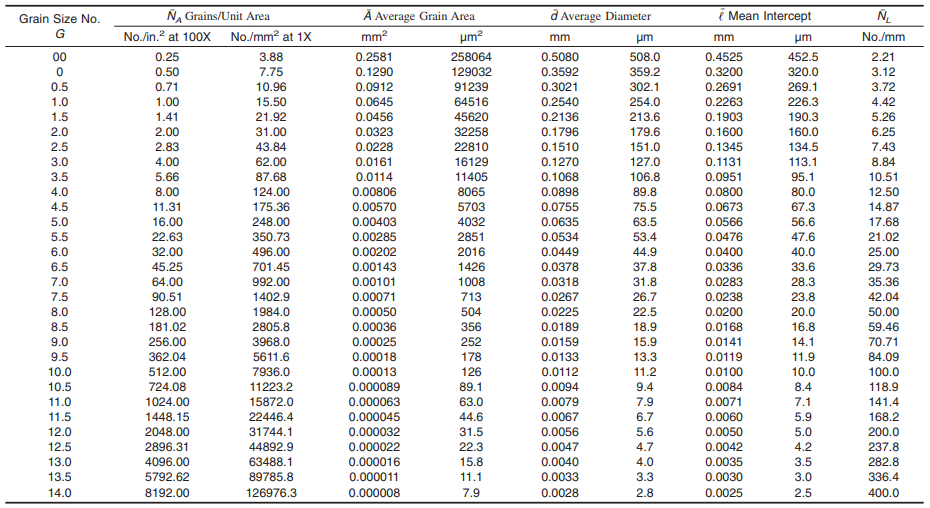

In [2]:
imgO = cv.imread('1024x759.jpg')
img = cv.imread('1024x759.jpg',0)
img = ndimage.gaussian_filter(img, sigma=3)

Se lee la imagen o micrografía y se aplica un filtro Gaussiano con $\sigma=3$.

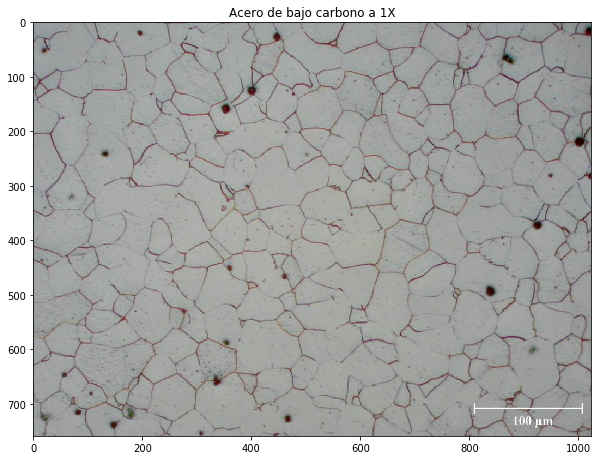

In [3]:
plt.figure(figsize=(10,10))
plt.title('Acero de bajo carbono a 1X')
plt.imshow(imgO);

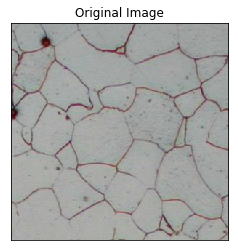

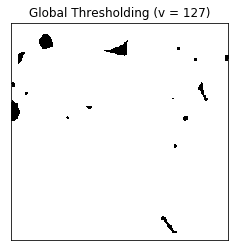

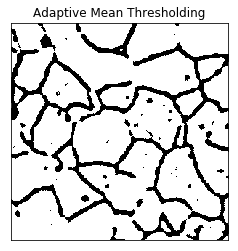

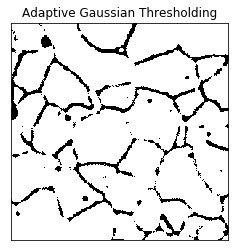

In [4]:
ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [imgO[0:300, 400:700,:], th1[0:300, 400:700], th2[0:300, 400:700], th3[0:300, 400:700]]
for i in range(4):
    plt.figure(i),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
    plt.show()

Este código se utiliza con el fin de ver cual thresholding nos funciona mejor, en este caso se utilizará el thresholding Gaussiano adaptativo. Ya que diferencia mejor los limites de grano de las impurezas en la micrografía. 

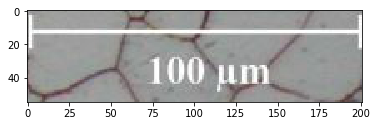

In [5]:
plt.imshow(imgO[695:750, 808:1009, :]);

Se estima una relación entre el número de pixeles y la longitud que estos representan en la imagen. 

In [6]:
def numeroIntersecciones(thresh, linea):
    valores = np.asarray(thresh[linea, :])
    cont = 0
    for i, v in enumerate(valores):
        if valores[i-1]!=valores[i] and valores[i]>200:
            cont = cont+1
    return cont-1

Se define una función que realiza un conteo de intersecciones de una línea generada en la dirección x (de izquierda a derecha).

In [7]:
def valIntersecciones(thresh):
    numInterProm = np.zeros(len(thresh))
    for i in range(len(thresh)):
        numInterProm[i] = numeroIntersecciones(thresh, i)
    return numInterProm

Se realiza el conteo de intersecciones para líneas generadas en cada pixel en la dirección y (de arriba hasta abajo).

In [8]:
def filtro(thresh):
    zero = []
    vector = valIntersecciones(thresh).tolist()
    prom = np.around(np.mean(vector))
    for i, v in enumerate(vector):
        if v<prom+0.5*prom and v>prom-0.5*prom:
            zero.append(vector[i])
    return np.array(zero)

Se utiliza un filtro que calcula el promedio de las intersecciones realizadas y elimina los valores que se alejan más del 50% de este valor.  

In [9]:
def N_L(intersecciones, C=1.5, M=1):
    nl=(intersecciones*M)/(1024*(0.1/201)) # 1024 pixeles*0.1 mm/201 pixeles
    return nl

Se calcula el $\bar{N}_L$ de cada linea generada.

In [10]:
def G(N_L):
    return (6.643856*np.log10(N_L))-3.288

Se calcula el tamaño de grano G.

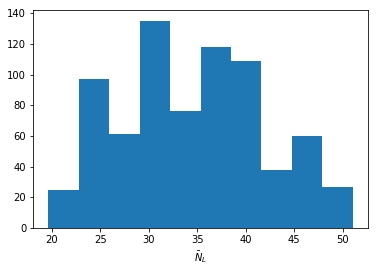

In [11]:
nls = N_L(filtro(th3))
plt.xlabel('$ \\bar{N}_L$')
plt.hist(nls);

Si se saca el valor promedio de $\bar{N}_L$:

In [12]:
promN_L = np.around(np.mean(nls))
promN_L

34.0

Ahora el valor G asociado a el $\bar{N}_L$:

In [13]:
G(promN_L)

6.88692539186469

Se obtiene el diametro medio de grano de la micrografía asociado a este valor. El cual (interpolando) es igual a 0.033157 mm.